In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas import DataFrame
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

$$ X_t = \phi_i + \sum_{i=1}^p \phi_i X_{t-i} + \epsilon_t + \theta_0+\sum_{j=1}^q \theta_j \epsilon_{t-j} $$


In [2]:
#ARMA(1,1)

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


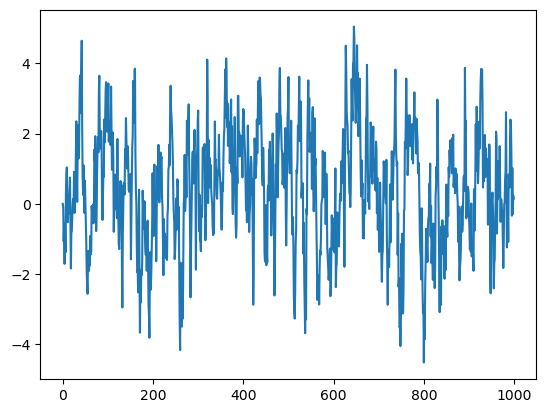

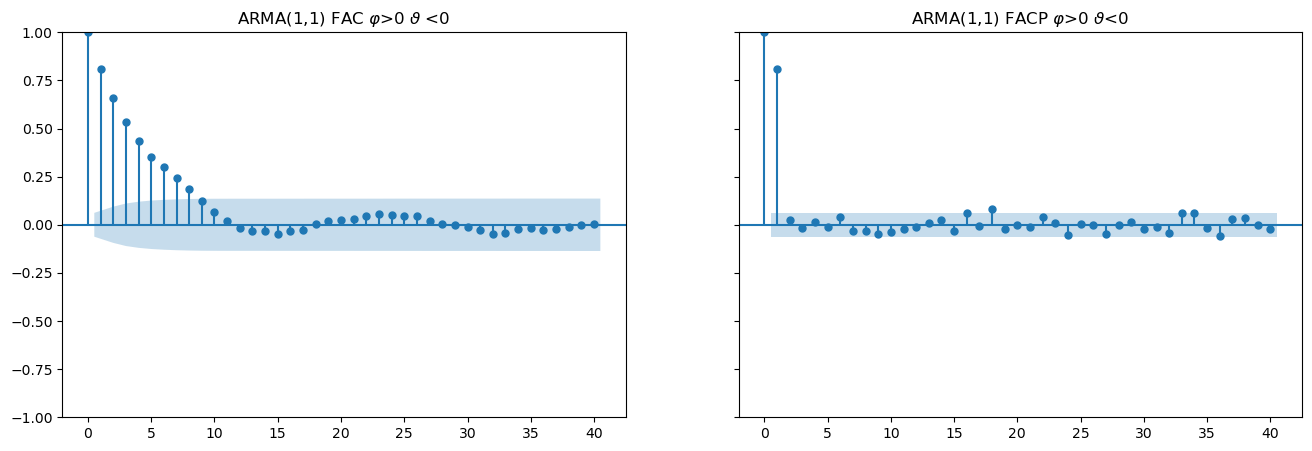

In [3]:
#Como combicacion de un AR (1) y MA(1)
#Los parámetros phi y theta se intoducen manualmente para poder obtener los diferentes correlogramas
#Por simplicidad phi0 y theta=0 ya que se puede expresar sin perdida en desviaciones
n=1000
#Generacion ruido blanco gaussiano
wn=np.random.randn(n)
#Inicializacion matriz
arma11=np.zeros(n)
phi=0.8
theta=-0.5

if phi > 0:
    
    phistring=">0"
else:
    phistring="<0"
    
if theta > 0 :
    
    thetastring=">0"
else:
    thetastring="<0"

if phi > abs(1) :
    print("Phi tiene que ser menor que |1| para que sea estacionario")
elif theta > abs(1):
    print("Theta tiene que ser menor que |1| para que sea invertible")      

for i in range(1,n):
       arma11[i]= phi*arma11[i-1] - theta*wn[i-i] + wn[i]

plt.plot(arma11)
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(16,5))

fig=sm.graphics.tsa.plot_acf(arma11, lags=40, ax=ax[0],title=r'ARMA(1,1) FAC $\varphi${} $\vartheta$ {}'.format(phistring,thetastring))
fig=sm.graphics.tsa.plot_pacf(arma11,lags=40, ax=ax[1],title=r'ARMA(1,1) FACP $\varphi${} $\vartheta${}'.format(phistring,thetastring))

Text(0.5, 1.0, 'ARMA(1,1)')

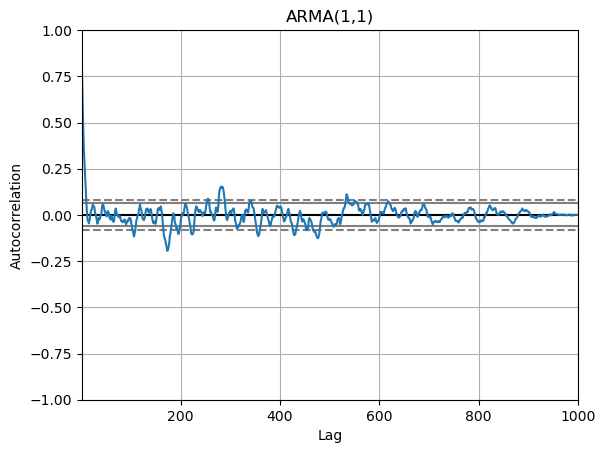

In [4]:
autocorrelation_plot(arma11)
plt.title('ARMA(1,1)')

In [5]:
#Modelos ARMA generalizados a traves de libreria

In [6]:
def genarma(n,p,q,retardos):
    ar_params = np.random.uniform(-1,1,p)
    ma_params = np.random.uniform(-1,1,q)
    ar = np.r_[1, -ar_params]
    ma = np.r_[1, ma_params]
    arma = sm.tsa.ArmaProcess(ar, ma).generate_sample(nsample=n)
    #https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html
    '''
    The conventions of the arma_generate function require that we specify a 1 for the zero-lag of the AR and MA 
    parameters and that the AR parameters be negated.
    '''

    plt.title('Serie ARMA({},{})'.format(p,q))
    plt.plot(arma)
    
    fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(16,5))
   
    fig=sm.graphics.tsa.plot_acf(arma, lags=retardos, ax=ax[0],title='ARMA({},{})\n FAC'.format(p,q))
    fig=sm.graphics.tsa.plot_pacf(arma,lags=retardos, ax=ax[1],title='ARMA({},{})\n FACP'.format(p,q)) 
    
    
   
    
    plt.show()
    return arma

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


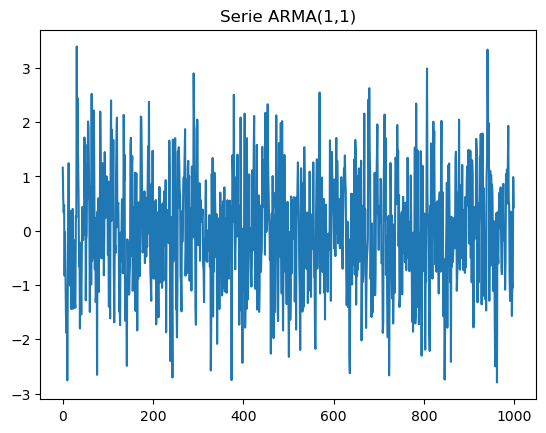

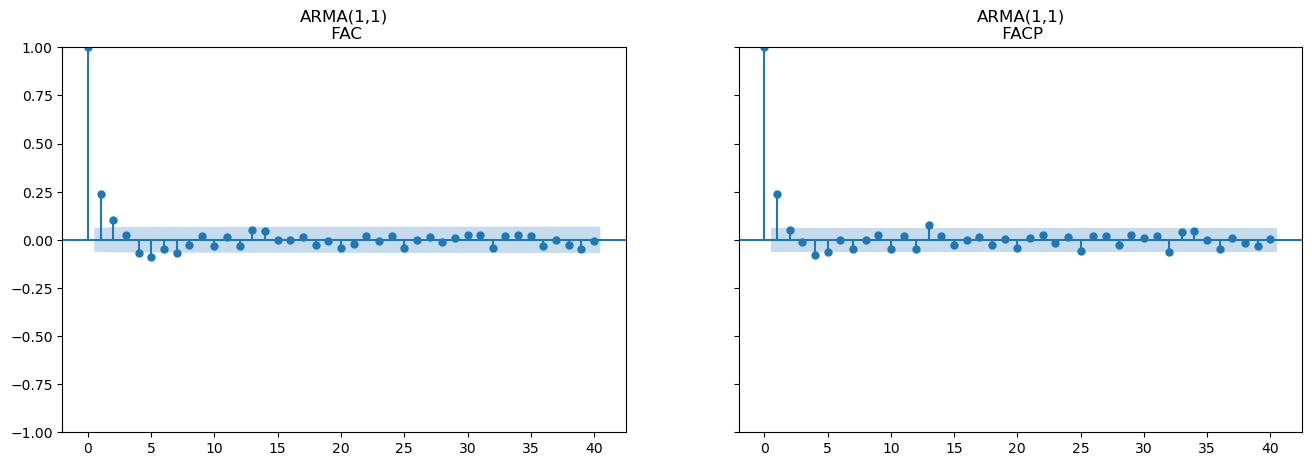

In [7]:
#Comprobacion que obtenemos el mismo resultado para arma11
arma11=genarma(1000,1,1,40)


Text(0.5, 1.0, 'ARMA(1,1)')

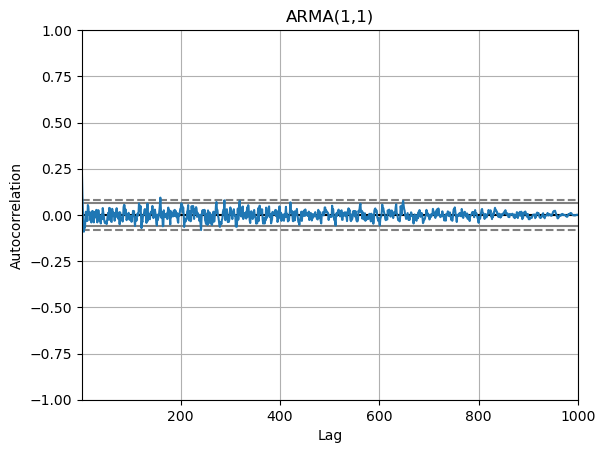

In [8]:
autocorrelation_plot(arma11)
plt.title('ARMA(1,1)')

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


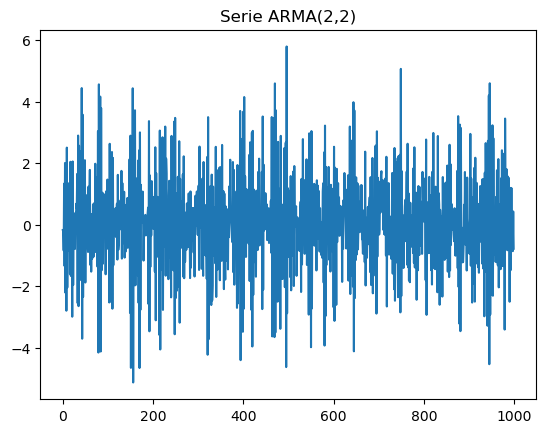

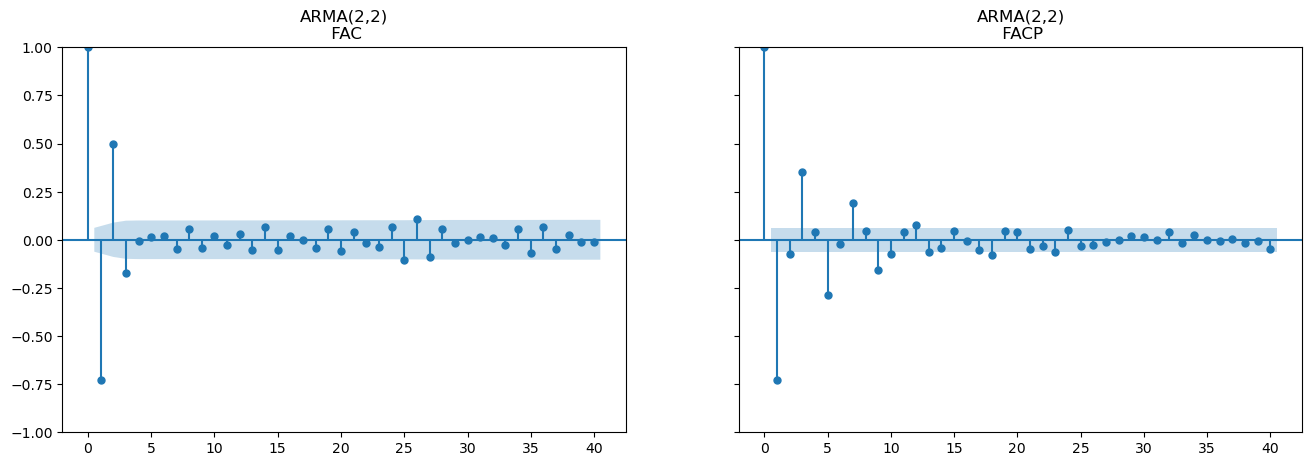

In [9]:
arma22=genarma(1000,2,2,40)

Text(0.5, 1.0, 'ARMA(2,2)')

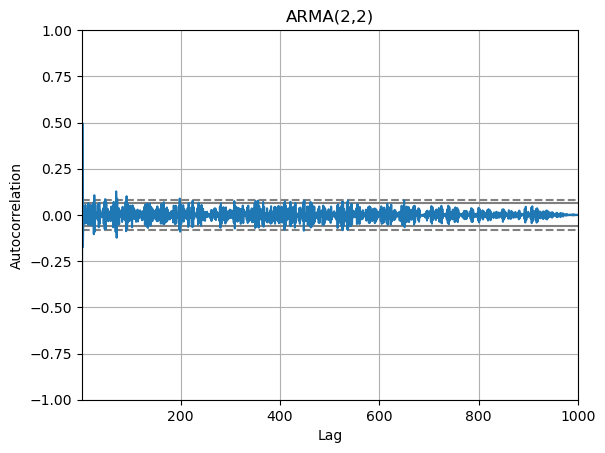

In [10]:
autocorrelation_plot(arma22)
plt.title('ARMA(2,2)')

/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


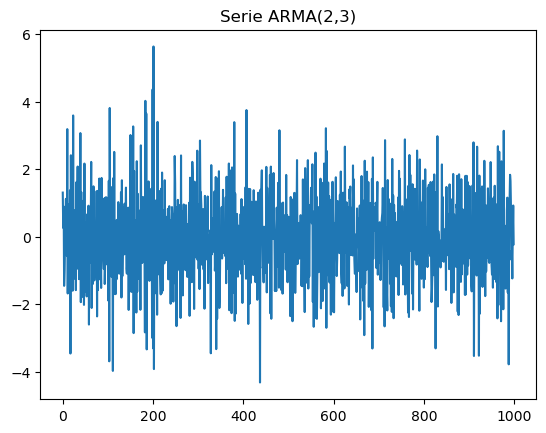

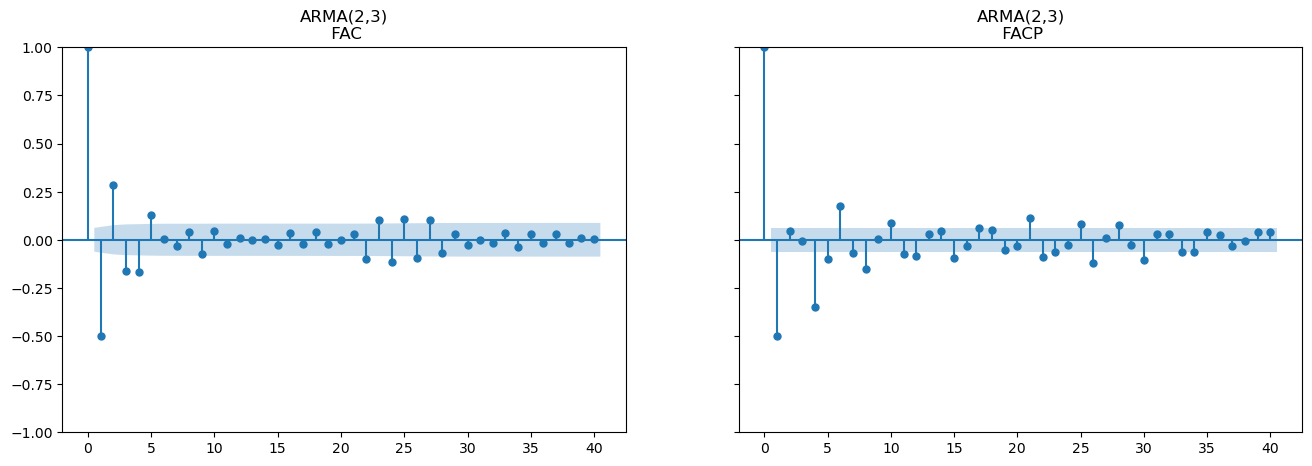

In [11]:
arma23=genarma(1000,2,3,40)

Text(0.5, 1.0, 'ARMA(2,3)')

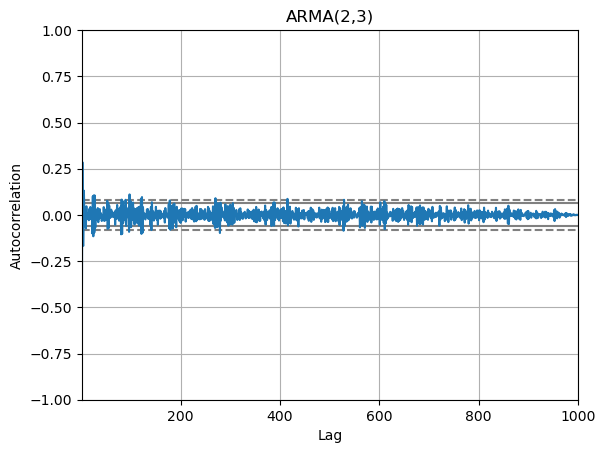

In [12]:
autocorrelation_plot(arma23)
plt.title('ARMA(2,3)')